<br>

# Técnicas Matemáticas para Big Data - Project 01 - Fuzzy Logic
<br><br>


GROUP 09:
- Eduardo Jardim - Nº 105062 - 33% Work Participation
- João Vieitas   - Nº 97632  - 34% Work Participation
- Diogo Marto    - Nº 108298 - 33% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

O Vinho é um bem cada vez mais apreciado e consumido para um esptro cada vez maior de consumidores. Portual está no top 10 de exportadores de vinho (principalmente vinho verde), com cerca de 3% de quota de mercado e um crescimento de 38% das exportações. Para suportar este crescimento, as empresas produtoras de vinho estão cada vez mais focadas trazer novas tecnologias ao processo de fabrico e venda do vinho. 

A certificação é apenas um dos passos por onde o vinho tem que passar para poder ser comercializado. A Avaliação de qualidade, essencial no processo de certiificação, pode ser usado para melhorar o fabrico do vinho (identificando os fatores mais influentes) e pode ser útil para estratificar os vários vinhos e as marcas premium (útil para definir preços). Esta avalialão é bastante complicada, uma vez que (a par de algums testes químicos) se baseia quase exclusivamente em testes sensoriais feitos por enólogos.


Assim, neste trabalho vamos usar fuzzy logic, usando cinco variáveis (propriedades físicas e químicas do vinho), as preferências humanas para o vinho verde português, de forma a tentar prever qual será a classicação que um vinho com determinadas características físicas (e tendo em conta a avaliação feita pelos enólogos) terá.

De acordo com o estudo em que o grupo se baseou, «modelar as preferências de vinho pode ser uma tarefa bastante útil não apenas para o marketing, mas também para melhorar a produção de vinho ou suportar as avaliações feitas por enólogos nas provas de vinho. Assim, considerámos bastante interessante abordar este tema e usar este dataset para este primeiro trabalho de técnicas matemáticas para Big Data.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

este trabalho immplementamos um sistema fuzzy otimizado por um algoritmo, para ajustar automaticamente as regras fuzzy que, dado o conjunto de características químicas que compões as variáveis de entrada (como os níveis de acidez, o acúcar residual, o álcool e o dióxido de enxofre), influenciam a qualidade de um vinho. O objetivo passa por minimizar também o erro de previsão da qualidade do vinho.

Para criação dos fuzzy sets foi criada uma função que através dos quantis e de constantes heurísticas gera os triângulos dos conjuntos de pertença: ol, low, normal, high, oh, MIN, MAX através dos key values (minímo, máximo, quantis) de cada variável.
O fuzzy set do output (quality) foi definido com apenas 3 conjuntos de pertença (low, normal, high) de forma a diminuir o número de regras necessário para computar o problema sem correr o risco de obter área 0 para alguns conjuntos de entrada. Utilizaram-se trapézios e um triângulo de forma a tentar diminuir a previsão mais comum quality=6.

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

Vários autores estudaram, ao longo do tempo, de que forma seria possível prever ou estimar a qualidade de um determinado vinho, recorrendo às suas propriedades físicas e químicas. Em 2008, Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos e José Reis tentaram, como o seu estudo intitulado «Modeling wine preferences by data mining from physicochemical properties», utilizar redes neuronais para resolver este problema. Este estudo obteve resultados e conclusões interessantes, descritos pelos autores como «encoragadores», com o modelo SVM (Support vector machine) a exceder a performance de outras técnicas como as Redes Neuronais e as Regressões Múltiplas.

Já em 2015, O artigo onde nos inspirámos para escolher este dataset é intitulado «Modeling Wine Preferences from Physicochemical Properties using Fuzzy Techniques» e escrito por Àngela Nebot, Francisco Mugica e Antoni Escobet. Neste artigo, são utilizadas quatro técnicas Fuzzy: três delas são Genetic Fuzzy Systems (GFS), estruturas Fuzzy que identificam a estrutura e parâmetros do problema através de médias de algoritmos genéticos (GA)  e um algoritmo Fuzzy Inductive Reasoning (FIR), que é uma «mistura» entre abordagens Fuzzy e de Machine Learning. Todos estes algoritmos são comparados entre si tendo em conta a accuracy da previsão e o esforço computacional, e são ainda comparados com outras técnicas de Data Mining aplicadas ao mesmo problema. 

Para prever qual será a avaliação dada pelo modelo para a qualidade de cada vinho, são utilizadas as seguintes variáveis (indicadores e componentes físicos e químicos): Acidez fixa (FA); Acidez Variável (VA); Ácido Cítrico (CA); Açúcar Residual (RS); Cloretos (CH); Dióxido de Enxofre Livre (FSD); Dióxido de Enxofre Total (TSD); Densidade (DE); pH; Sulfatos (SU) e Alcool (AL). O artigo conclui que as variáveis mais inflluentes são álcool, acidez fixa, dióxido de enxofre livre, açúcar residual e a acidez variável». O FIR (uma das quatro técnicas usadas), aplicada com as cinco variáveis anteriores, é o modelo que atinge a melhor performance, ultrapassando em larga escala o desempenho das outras técnicas fuzzy híbridas estudadas no artigo e tamém de outras metodologias de data mining, assim como o desempenho das redes neuronais e do SVM.

Os resultados destes trabalhos são muito importantes para a indústria do vinho, ao integrar testes objetivos da qualidade do vinho no sistema de decisão dos enólogos, de forma a complementar a análise feita pelos enólogos através das provas (esta prova feita pelo ser humano, apesar de subjetiva, é obrigatória por lei em Portugal).

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

Inicialmente foi importado o dataset e dividio em treino e teste. De seguida forma criados os fuzzy sets das cinco variáveis de entrada e também do output.

A parte principal do código é onde é utilizado o GA para otimizar o conjunto de regras. Este foi definido com o formato IF a AND b THEN c, isto é, cada regra depende da interseção de duas variáveis de entrada para obter um output. Viu-se que regras que continham sempre todas as cinco variáveis de entrada (IF a AND b AND c AND d ADN e THEN f) trariam uma necessidade de ter um número de regras muito grande, que faria com que fosse necessário imenso tempo para obter um conjunto de regras otimizado.

Para otimizar o conjunto de regras, este é avaliado por uma função que transforma as previsões no inteiro mais próximo (tornando o problema num classificador) e calcula a accuracy da mesma. Consoante a evolução da métrica escolhida é, a cada iteração, guardada a melhor população e no final obtém-se o Best Individual que corresponde ao conjunto de regras otimizado.

Para análise dos resultados é criado um controlador fuzzy usando o conjunto de regras otimizado e calculadas as accuracies e a matriz de confusão de treino e teste. São também desenhados os histogramas para ambos os conjuntos de dados de forma a compreender a distribuição das previsões.

Também foi feita uma porção de código onde é possível ver o comportamento do controlador fuzzy para cada caso específico juntamente com o valor (regressão através apenas do centroide) obtido e comparar com a qualidade real.

No exemplo 2, tentámos melhorar a desfuzzificação para tal para todos os exemplos dividimos a área obtida em 3 partições de tamanho igual e calculamos para cada partição o centroide e a percentagem de area em relação a área original ( para cada item no dataset temos \[Parea1,centroide1,Parea2,centroide2,Parea3,centroide3\] ). Como a frequêcia de cada classe não é igual fizemos oversampling das classes com menos frequência. Depois, experimentamos 3 modelos sobre as novas features obtidas nomeadamente:
- Regressão linear com regularização l1 (Lasso, com este tipo de regularização os coeficientes podem convergir para exatamente 0 ao invés de Ridge)
- Regressão linear com regularização l1 e novas features através de combinaçãoes polinomais das features obtidas ( podemos ter por exemplo Parea1\*centroide1 + Parea2\*centroide2+Parea3\*centroide3 que igual ao Centroide da area total. )
- Rede neuronal simples

Para cada dos modelos, avaliamos MAE, accuracy sobre dados de teste e fazemos confusion matrix e histograma para melhor compreender o comportamento de cada modelo.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries

In [1]:
import sys
print(sys.version_info)

try:
    import numpy as np
    import pandas as pd
    import skfuzzy as fuzz
    import matplotlib.pyplot as plt
    from random import sample, choice
    from skfuzzy import control as ctrl
    from deap import base, creator, tools, algorithms
    from sklearn.metrics import accuracy_score, confusion_matrix
    from random import choice
    from collections import Counter 
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import RandomOverSampler
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_absolute_error

except:
    %pip install -U numpy matplotlib scikit-fuzzy
    %pip install deap

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)


<br><br>

## 6. Dataset and variables explanation [1,5 valor]

Os dados usados neste trabalho têm origem na região do Minho e o dataset está diponível no UCI machine learning repository (UCI, 2015). Os dados foram recolhidos entre Maio de 2004 e Fevereiro de 2007, sendo um conjunto de dados bastante maior do que os outros datasets usados em benchmarks e problemas do mesmo âmbito para este tema.

De acordo com o estudo onde nos baseámos e que criou este dataset, cada uma das 4898 amostras de vinho foi avaliada por um mínimo de três enólogos, através de provas cegas, que avaliaram o vinho numa escala de 0 a 10 (de muito mau a excelente qualidade, respetivamente). O score final é dado pela mediana dessas avaliações. Esta variável segue uma ditribuição normal «típica», com minimo e máximo de 3 e 9 para o vinho branco.

Do conjunto das 11 variáveis explicativas que já referimos anteriormente, iremos utilizar para este trabalho apenas cinco (álcool, acidez fixa, dióxido de enxofre livre, açúcar residual, acidez variável), que consideramos serem as mais relevantes. De facto, como vemos no artigo base do nosso trabalho, «o FIR descobre que as variáveis que têm uma relação causal mais forte com a qualidade do vinho são: álcool, acidez fixa, dióxido de enxofre livre, açúcar residual e a acidez variável». O ácido cítrico e os sulfatos (que não vamos usar) são também variáveis que têm relação causal com a qualidade do vinho, mas não com a mesma força que as anteriores. 

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')

# Split the data into features (X) and target (Y)
X = data[['alcohol', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'volatile acidity']]
Y = data['quality']

# Split into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

# Check original class distribution
print("Original class distribution:", Counter(Y_train), "\n")


Training set size: 3918
Test set size: 980
Original class distribution: Counter({6: 1766, 5: 1166, 7: 688, 8: 140, 4: 138, 3: 15, 9: 5}) 



In [3]:
# Function to generate triangular membership sets

def extract_key_values(x):
    MIN = min(x)
    MAX = max(x)
    
    a = 1.5  
    b = 0.5
    c = 0.5
    
    q1 = np.quantile(x, 0.25)
    q2 = np.quantile(x, 0.50)  
    q3 = np.quantile(x, 0.75)
    
    LL = max(MIN, q1 - a * (q3 - q1))
    HL = min(MAX, q3 + a * (q3 - q1))
    
    v1 = c * (LL - MIN)
    v2 = c * (MAX - HL)
    
    # Define triangular membership functions (three points each)
    ol = [MIN, MIN, LL]         
    low = [MIN, q1, q2]         
    normal = [q1, q2, q3]       
    high = [q2, q3, HL]         
    oh = [HL, MAX, MAX]         
    
    return ol, low, normal, high, oh, MIN, MAX

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


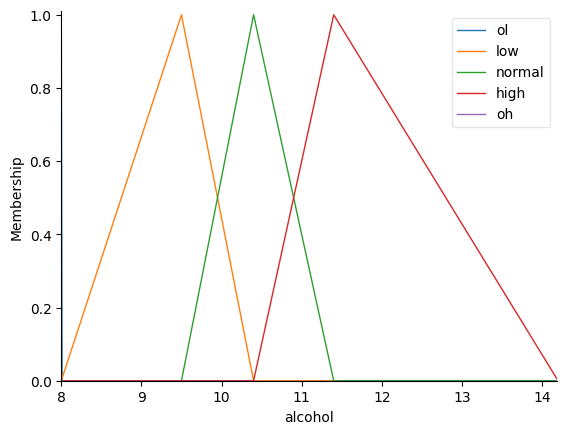

In [4]:
# Define fuzzy sets for alcohol
ol_alcohol, low_alcohol, normal_alcohol, high_alcohol, oh_alcohol, alcohol_min, alcohol_max = extract_key_values(X_train.iloc[:, 0])
alcohol = ctrl.Antecedent(np.arange(alcohol_min, alcohol_max, 0.01), 'alcohol')

alcohol['ol'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), ol_alcohol)
alcohol['low'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), low_alcohol)
alcohol['normal'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), normal_alcohol)
alcohol['high'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), high_alcohol)
alcohol['oh'] = fuzz.trimf(np.arange(alcohol_min, alcohol_max, 0.01), oh_alcohol)

alcohol.view()  

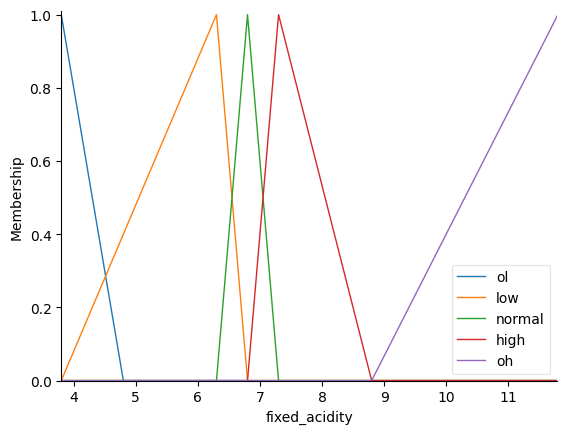

In [5]:
# Define fuzzy sets for fixed acidity
ol_fixed_acidity, low_fixed_acidity, normal_fixed_acidity, high_fixed_acidity, oh_fixed_acidity, fixed_acidity_min, fixed_acidity_max = extract_key_values(X_train.iloc[:, 1])
fixed_acidity = ctrl.Antecedent(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), 'fixed_acidity')

fixed_acidity['ol'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), ol_fixed_acidity)
fixed_acidity['low'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), low_fixed_acidity)
fixed_acidity['normal'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), normal_fixed_acidity)
fixed_acidity['high'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), high_fixed_acidity)
fixed_acidity['oh'] = fuzz.trimf(np.arange(fixed_acidity_min, fixed_acidity_max, 0.01), oh_fixed_acidity)

fixed_acidity.view()


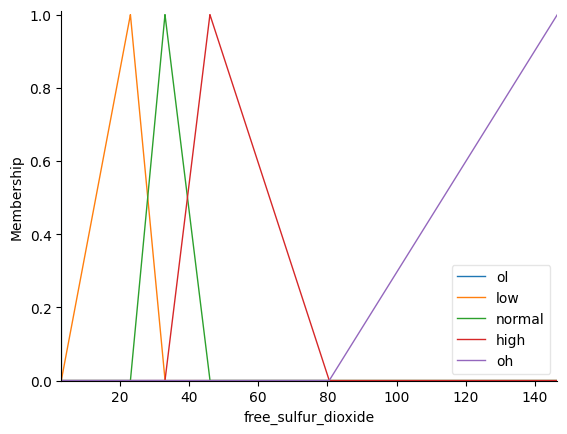

In [6]:
# Define fuzzy sets for free sulfur dioxide
ol_free_sulfur_dioxide, low_free_sulfur_dioxide, normal_free_sulfur_dioxide, high_free_sulfur_dioxide, oh_free_sulfur_dioxide, free_sulfur_dioxide_min, free_sulfur_dioxide_max = extract_key_values(X_train.iloc[:, 2])
free_sulfur_dioxide = ctrl.Antecedent(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), 'free_sulfur_dioxide')

free_sulfur_dioxide['ol'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), ol_free_sulfur_dioxide)
free_sulfur_dioxide['low'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), low_free_sulfur_dioxide)
free_sulfur_dioxide['normal'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), normal_free_sulfur_dioxide)
free_sulfur_dioxide['high'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), high_free_sulfur_dioxide)
free_sulfur_dioxide['oh'] = fuzz.trimf(np.arange(free_sulfur_dioxide_min, free_sulfur_dioxide_max, 0.01), oh_free_sulfur_dioxide)

free_sulfur_dioxide.view()

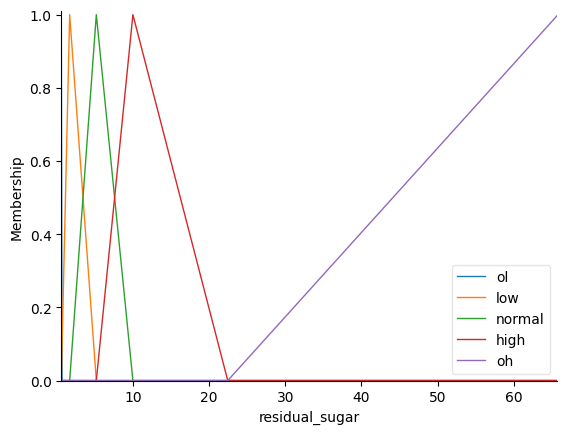

In [7]:
# Define fuzzy sets for Residual Sugar
ol_sugar, low_sugar, normal_sugar, high_sugar, oh_sugar, sugar_min, sugar_max = extract_key_values(X_train.iloc[:, 3])
sugar = ctrl.Antecedent(np.arange(sugar_min, sugar_max, 0.1), 'residual_sugar')

sugar['ol'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), ol_sugar)
sugar['low'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), low_sugar)
sugar['normal'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), normal_sugar)
sugar['high'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), high_sugar)
sugar['oh'] = fuzz.trimf(np.arange(sugar_min, sugar_max, 0.1), oh_sugar)

sugar.view()  

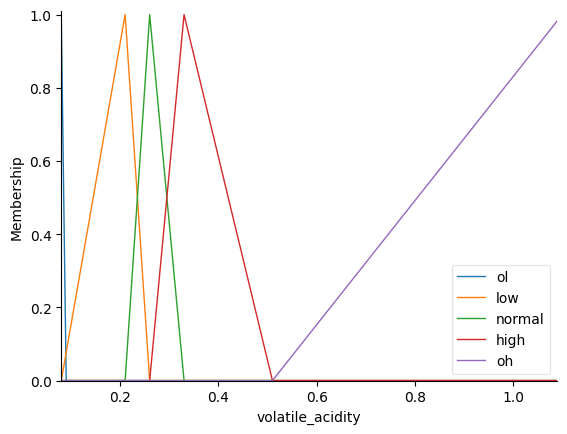

In [8]:
# Define fuzzy sets for volatile acidity
ol_volatile_acidity, low_volatile_acidity, normal_volatile_acidity, high_volatile_acidity, oh_volatile_acidity, volatile_acidity_min, volatile_acidity_max = extract_key_values(X_train.iloc[:, 4])
volatile_acidity = ctrl.Antecedent(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), 'volatile_acidity')

volatile_acidity['ol'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), ol_volatile_acidity)
volatile_acidity['low'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), low_volatile_acidity)
volatile_acidity['normal'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), normal_volatile_acidity)
volatile_acidity['high'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), high_volatile_acidity)
volatile_acidity['oh'] = fuzz.trimf(np.arange(volatile_acidity_min, volatile_acidity_max, 0.01), oh_volatile_acidity)

volatile_acidity.view()

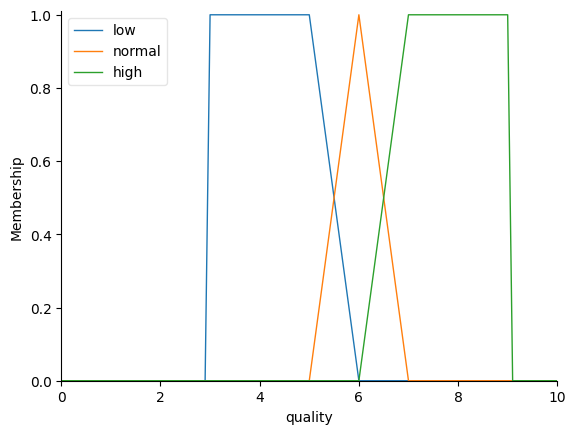

In [9]:
# Define the output variable: wine quality
quality = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'quality')  

min_quality = min(Y)
max_quality = max(Y)

# Adjusted membership functions to reduce predictions around 6
quality['low'] = fuzz.trapmf(quality.universe, [min_quality, min_quality, 5, 6])
quality['normal'] = fuzz.trimf(quality.universe, [5, 6, 7]) 
quality['high'] = fuzz.trapmf(quality.universe, [6, 7, max_quality, max_quality])

quality.view()


In [10]:
# List of all antecedent variables
antecedents = ['sugar', 'volatile_acidity', 'alcohol', 'fixed_acidity', 'free_sulfur_dioxide']

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
n_rules = 100

toolbox = base.Toolbox()

# Define random rule generation for each pair of antecedents
def generate_rule():
    antecedent_pair = sample(antecedents, 2)  # Select two random antecedents
    return [
        (antecedent_pair[0], choice(['ol', 'low', 'normal', 'high', 'oh'])),
        (antecedent_pair[1], choice(['ol', 'low', 'normal', 'high', 'oh'])),
        choice(['low', 'normal', 'high'])  # Consequent for quality
    ]

toolbox.register("attr_rule", generate_rule)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_rule, n=n_rules)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation Function
def evaluate(individual):
    rule_list = []
    for antecedent1, antecedent2, consequent in individual:
        # Get the fuzzy variables and membership functions
        antecedent_var1 = eval(antecedent1[0])
        antecedent_level1 = antecedent1[1]
        antecedent_var2 = eval(antecedent2[0])
        antecedent_level2 = antecedent2[1]
        
        consequent_level = consequent
        
        # Define fuzzy rule based on the individual
        rule = ctrl.Rule(
            antecedent_var1[antecedent_level1] & antecedent_var2[antecedent_level2],
            quality[consequent_level]
        )
        rule_list.append(rule)
    
    # Create control system and simulation
    system = ctrl.ControlSystem(rule_list)
    simulator = ctrl.ControlSystemSimulation(system)
    
    # Evaluate using mean absolute error or other metric
    predictions = np.zeros(len(X))
    for i, row in X.iterrows():
        try:
            simulator.input['sugar'] = row['sugar']
            simulator.input['volatile_acidity'] = row['volatile acidity']
            simulator.input['alcohol'] = row['alcohol']
            simulator.input['fixed_acidity'] = row['fixed_acidity']
            simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
            simulator.compute()
            predictions[i] = simulator.output['quality']
        except:
            predictions[i] = 0  # Handle errors in computation

    # Round predictions to the nearest integer
    predictions = np.round(predictions).astype(int)
    
    acc = accuracy_score(Y, predictions)

    return (acc,)


# Register the evaluate function
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Execute Genetic Algorithm
population = toolbox.population(n=30)
NGEN = 10
CXPB = 0.7
MUTPB = 0.1

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Output the best individual
best_individual = tools.selBest(population, k=1)[0]
print("Best individual:", best_individual)

Best individual: [[('fixed_acidity', 'normal'), ('alcohol', 'high'), 'low'], [('volatile_acidity', 'oh'), ('alcohol', 'low'), 'high'], [('sugar', 'normal'), ('free_sulfur_dioxide', 'ol'), 'low'], [('sugar', 'oh'), ('alcohol', 'low'), 'high'], [('fixed_acidity', 'normal'), ('alcohol', 'ol'), 'normal'], [('sugar', 'low'), ('fixed_acidity', 'ol'), 'normal'], [('fixed_acidity', 'ol'), ('volatile_acidity', 'low'), 'normal'], [('alcohol', 'oh'), ('free_sulfur_dioxide', 'low'), 'low'], [('volatile_acidity', 'low'), ('sugar', 'oh'), 'high'], [('alcohol', 'high'), ('sugar', 'high'), 'high'], [('alcohol', 'high'), ('volatile_acidity', 'ol'), 'high'], [('free_sulfur_dioxide', 'oh'), ('sugar', 'low'), 'high'], [('sugar', 'normal'), ('alcohol', 'normal'), 'normal'], [('alcohol', 'oh'), ('sugar', 'low'), 'high'], [('free_sulfur_dioxide', 'normal'), ('sugar', 'low'), 'normal'], [('sugar', 'ol'), ('alcohol', 'normal'), 'high'], [('sugar', 'oh'), ('alcohol', 'high'), 'high'], [('fixed_acidity', 'normal

In [11]:
rule_list=[]

# Recreate rules from the optimized best individual
for antecedent1, antecedent2, consequent in best_individual:
    # Extract variable names and membership levels
    antecedent_var1 = eval(antecedent1[0])
    antecedent_level1 = antecedent1[1]
    antecedent_var2 = eval(antecedent2[0])
    antecedent_level2 = antecedent2[1]
    consequent_level = consequent

    # Define the rule for each gene in the optimized individual
    rule = ctrl.Rule(
        antecedent_var1[antecedent_level1] & antecedent_var2[antecedent_level2],
        quality[consequent_level]
    )
    rule_list.append(rule)

#print(rule_list)      

# Update control system with optimized rules
system = ctrl.ControlSystem(rule_list)
optimized_simulator = ctrl.ControlSystemSimulation(system)

In [13]:
# Evaluate ACC on the training set using the optimized rules

train_predictions = np.zeros(len(X_train))  # Preallocate with zeros

# Predictions for training set
for i, (_, row) in enumerate(X_train.iterrows()):
    # Set inputs for each variable
    optimized_simulator.input['residual_sugar'] = row['residual sugar']
    optimized_simulator.input['volatile_acidity'] = row['volatile acidity']
    optimized_simulator.input['alcohol'] = row['alcohol']
    optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
    optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']

    # Compute the output quality
    try:
        optimized_simulator.compute()
        predicted_quality = optimized_simulator.output['quality']
        
        # Round prediction to nearest integer
        train_predictions[i] = round(predicted_quality)
        print(i, end='\r')
    except Exception as e:
        print("ERROR: Error getting prediction!")
        train_predictions[i] = 0

# Calculate the accuracy for the training set
train_acc = accuracy_score(Y_train, train_predictions)
print("Training Accuracy: {:.2f}".format(train_acc))

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(Y_train, train_predictions)
print(conf_matrix_train)

ERROR: Error getting prediction!
Training Accuracy: 0.36
[[   0    0    0    0    0    0    0    0]
 [   0    0    0    3   11    1    0    0]
 [   0    0    4   44   81    9    0    0]
 [   0    0   59  304  772   28    3    0]
 [   1    0  102  527 1075   58    3    0]
 [   0    0   17  188  460   20    3    0]
 [   0    0    2   19  107    9    3    0]
 [   0    0    0    2    3    0    0    0]]


Train Accuracy: 35.89%


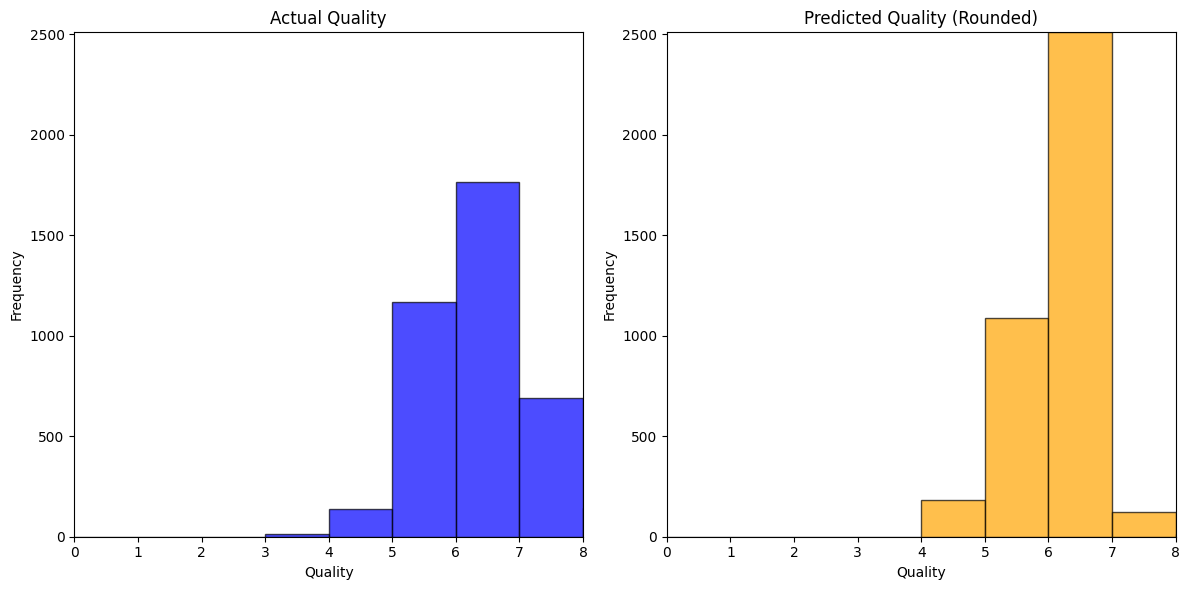

In [14]:
# Histograms for TRAIN

# Round predicted values to the closest integer
rounded_train_predictions = np.round(train_predictions)

# Calculate accuracy by comparing rounded predictions with actual values
train_accuracy = accuracy_score(Y_train, rounded_train_predictions)

print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

# Define common axis limits for consistency in both plots
x_min = min(Y_test.min(), rounded_train_predictions.min())
x_max = max(Y_test.max(), rounded_train_predictions.max())
y_max = max(
    np.histogram(Y_test, bins=range(int(x_min), int(x_max) + 2))[0].max(),
    np.histogram(rounded_train_predictions, bins=range(int(x_min), int(x_max) + 2))[0].max()
)

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for actual quality values
plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=range(int(x_min), int(x_max) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.title('Actual Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

# Histogram for predicted quality values
plt.subplot(1, 2, 2)
plt.hist(rounded_train_predictions, bins=range(int(x_min), int(x_max) + 2), alpha=0.7, color='orange', edgecolor='black')
plt.title('Predicted Quality (Rounded)')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

# Show plots
plt.tight_layout()
plt.show()

In [15]:
# Evaluate ACC on the test set using the optimized rules

test_predictions = np.zeros(len(X_test))  # Preallocate with zeros

# Predictions for test set
for i, (_, row) in enumerate(X_test.iterrows()):
    # Set inputs for each variable
    optimized_simulator.input['residual_sugar'] = row['residual sugar']
    optimized_simulator.input['volatile_acidity'] = row['volatile acidity']
    optimized_simulator.input['alcohol'] = row['alcohol']
    optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
    optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']

    # Compute the output quality
    try:
        optimized_simulator.compute()
        predicted_quality = optimized_simulator.output['quality']
        
        # Round prediction to nearest integer
        test_predictions[i] = round(predicted_quality)
        print(i, end='\r')
    except Exception as e:
        print("ERROR: Error getting prediction!")
        test_predictions[i] = 0

# Calculate the accuracy for the test set
test_acc = accuracy_score(Y_test, test_predictions)
print("Test Accuracy: {:.2f}".format(test_acc))

# Calculate the confusion matrix
conf_matrix_test = confusion_matrix(Y_test, test_predictions)
print(conf_matrix_test)

Test Accuracy: 0.34
[[  0   0   1   4   0   0]
 [  0   3   8  11   3   0]
 [  0  16  71 192  10   2]
 [  0  31 132 253  16   0]
 [  0   7  47 130   6   2]
 [  0   1  11  23   0   0]]


Test Accuracy: 33.98%


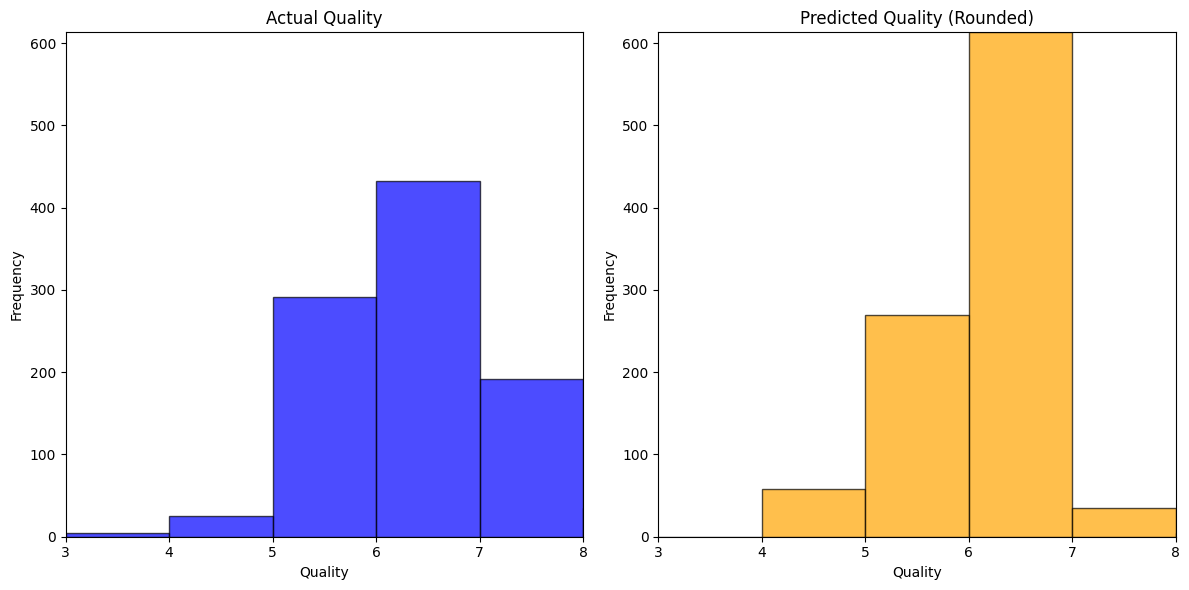

In [16]:
# Histograms for TEST

# Round predicted values to the closest integer
rounded_test_predictions = np.round(test_predictions)

# Calculate accuracy by comparing rounded predictions with actual values
test_accuracy = accuracy_score(Y_test, rounded_test_predictions)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Define common axis limits for consistency in both plots
x_min = min(Y_test.min(), rounded_test_predictions.min())
x_max = max(Y_test.max(), rounded_test_predictions.max())
y_max = max(
    np.histogram(Y_test, bins=range(int(x_min), int(x_max) + 2))[0].max(),
    np.histogram(rounded_test_predictions, bins=range(int(x_min), int(x_max) + 2))[0].max()
)

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for actual quality values
plt.subplot(1, 2, 1)
plt.hist(Y_test, bins=range(int(x_min), int(x_max) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.title('Actual Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

# Histogram for predicted quality values
plt.subplot(1, 2, 2)
plt.hist(rounded_test_predictions, bins=range(int(x_min), int(x_max) + 2), alpha=0.7, color='orange', edgecolor='black')
plt.title('Predicted Quality (Rounded)')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

# Show plots
plt.tight_layout()
plt.show()

### Defuzz Models

In [17]:
N_partitions = 3
Centroids_and_Areas = []
YCA = []
for i, (_, row) in enumerate(X.iterrows()):
        print(f"\r{i}", end="")
        try:
            optimized_simulator.input['residual_sugar'] = row['residual sugar']
            optimized_simulator.input['volatile_acidity'] = row['volatile acidity']
            optimized_simulator.input['alcohol'] = row['alcohol']
            optimized_simulator.input['fixed_acidity'] = row['fixed acidity']
            optimized_simulator.input['free_sulfur_dioxide'] = row['free sulfur dioxide']
            
            optimized_simulator.compute()
            # extract the probblem output to array
            area_res = np.zeros(len(quality.universe))
            for label, term in quality.terms.items():
                term_activation_mf = np.clip(quality[label].mf,None,term._cut)
                area_res = np.fmax(area_res,term_activation_mf)
            # split area_res in N parts 
            temp = [] 
            area_res_split = np.array_split(area_res,N_partitions)
            quality_universe_split = np.array_split(quality.universe,N_partitions)
            area_total = np.sum(area_res)
            # find area and centroid of each area_res_split 
            for j in range(N_partitions):
                area = np.sum(area_res_split[j])
                centroid = np.sum(area_res_split[j] * quality_universe_split[j]) / area if area > 0 else 0
                temp.append(area/area_total if area_total > 0 else 0)
                temp.append(centroid)
            Centroids_and_Areas.append(temp)
            # Write Label
            YCA.append(Y[i])
            optimized_simulator.reset()
        except Exception as e:
            print(f"\rError processing row {i}: \x1b[31m{e}\x1b[0m")

4897

In [29]:
XCA = np.array(Centroids_and_Areas)
YCA = np.array(YCA)

XCA_train, XCA_test, yca_train, yca_test = train_test_split(XCA, YCA, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42,sampling_strategy={3:2500,4:3000,5:3500,6:2000,7:3500,8:3000,9:2500})
XCA_train, yca_train = ros.fit_resample(XCA_train, yca_train)

In [36]:
def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)   

P = 3
XCA_train_poly = polynomial_features(XCA_train, P)
XCA_test_poly = polynomial_features(XCA_test, P)
XCA_all_poly = polynomial_features(XCA, P)

In [37]:
clf1 = Lasso(alpha=0.01)
clf2 = Lasso(alpha=0.01)
clf3 = MLPRegressor(activation="relu", hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

clf1.fit(XCA_train, yca_train)
clf2.fit(XCA_train_poly, yca_train)
clf3.fit(XCA_train_poly, yca_train)

print(list(float(x) for x in list(clf1.coef_)))
print(list(float(x) for x in list(clf2.coef_)))

c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.804e+03, tolerance: 7.600e+00
  model = cd_fast.enet_coordinate_descent(


[0.0, -0.11066464869860466, 0.0, -0.0, -1.403758662631686, 0.06252329072438444]
[0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.13876234249034178, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0008853042855909068, -0.0, 0.0, 0.024187692878569568, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 1.0292460904989524, -0.0, -0.0, -0.03900317371272923, 0.0, 0.05235713953388308, -0.0, -0.1501277156158674, 0.0, -0.0, -0.03724135949133882, 0.0, 0.018507693657661743, -0.0, 0.0, -0.0018965334406418905, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.18674328267803805, 0.10566854286647347, 0.0, -0.006667496842913279, -0.0, 0.0, -0.030062476919478647, -0.0, -2.039977183633908, 0.05834543103037056, 6.429275930475255e-05]


In [38]:
def bound(x):
    return np.round(np.fmax(0, np.fmin(10,x)))

yca1_pred_test = bound(clf1.predict(XCA_test))
yca2_pred_test = bound(clf2.predict(XCA_test_poly))
yca3_pred_test = bound(clf3.predict(XCA_test_poly))

yca1_pred_all = bound(clf1.predict(XCA))
yca2_pred_all = bound(clf2.predict(XCA_all_poly))
yca3_pred_all = bound(clf3.predict(XCA_all_poly))

mse1 = mean_absolute_error(yca_test, yca1_pred_test)
print(f"MAE with rounding for clf1: {mse1:.2f}")
mse2 = mean_absolute_error(yca_test, yca2_pred_test)
print(f"MAE with rounding for clf2: {mse2:.2f}")
mse3 = mean_absolute_error(yca_test, yca3_pred_test)
print(f"MAE with rounding for clf3: {mse3:.2f}")
print("-----------------------------------------")
accuracy1 = accuracy_score(yca_test, yca1_pred_test)
print(f"Accuracy on test for clf1:{accuracy1:.2f}")
accuracy2 = accuracy_score(yca_test, yca2_pred_test)
print(f"Accuracy on test for clf2:{accuracy2:.2f}")
accuracy3 = accuracy_score(yca_test, yca3_pred_test)
print(f"Accuracy on test for clf3:{accuracy3:.2f}")

MAE with rounding for clf1: 0.64
MAE with rounding for clf2: 0.74
MAE with rounding for clf3: 0.72
-----------------------------------------
Accuracy on test for clf1:0.44
Accuracy on test for clf2:0.39
Accuracy on test for clf3:0.39


{0: 0, 1: 0, 2: 0, 3: 5, 4: 25, 5: 291, 6: 432, 7: 192, 8: 35, 9: 0, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 9, 6: 960, 7: 11, 8: 0, 9: 0, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 4, 5: 87, 6: 760, 7: 127, 8: 0, 9: 2, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 24, 6: 819, 7: 137, 8: 0, 9: 0, 10: 0}


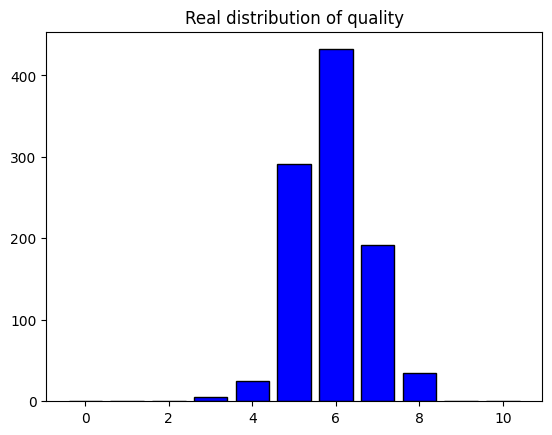

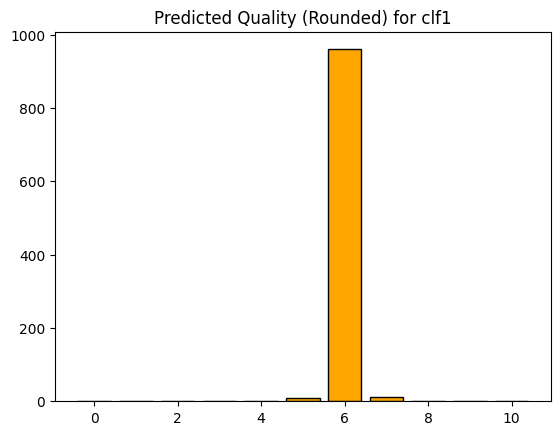

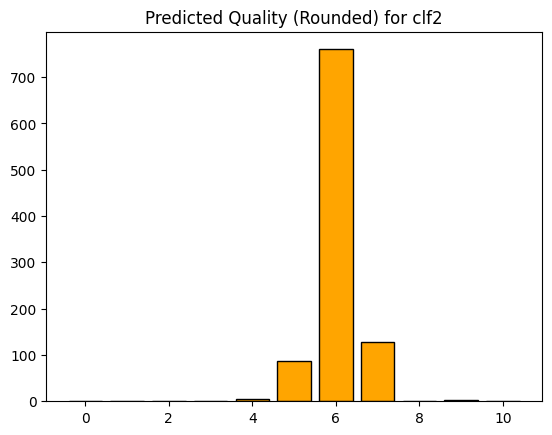

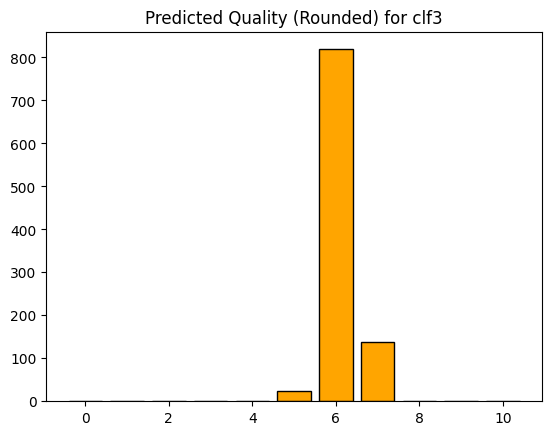

In [39]:
real_dict = { i:0 for i in range(11)}
clf1_dict = { i:0 for i in range(11)}
clf2_dict = { i:0 for i in range(11)}
clf3_dict = { i:0 for i in range(11)}

for i in range(len(yca_test)):
    real_dict[yca_test[i]] += 1
    clf1_dict[yca1_pred_test[i]] += 1
    clf2_dict[yca2_pred_test[i]] += 1
    clf3_dict[yca3_pred_test[i]] += 1

print(real_dict)
print(clf1_dict)
print(clf2_dict)
print(clf3_dict)

plt.bar(real_dict.keys(), real_dict.values(), label="real",color='blue', edgecolor='black')
plt.title('Real distribution of quality')
plt.show()

plt.bar(clf1_dict.keys(), clf1_dict.values(), label="clf1",color='orange', edgecolor='black')
plt.title('Predicted Quality (Rounded) for clf1')
plt.show()

plt.bar(clf2_dict.keys(), clf2_dict.values(), label="clf2",color='orange', edgecolor='black')
plt.title('Predicted Quality (Rounded) for clf2')
plt.show()

plt.bar(clf3_dict.keys(), clf3_dict.values(), label="clf3",color='orange', edgecolor='black')
plt.title('Predicted Quality (Rounded) for clf3')
plt.show()

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.  24.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3. 283.   5.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3. 426.   3.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   2. 188.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  34.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
------------------------------------------------------------
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   3.   1.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   4.  17.   4.   0.   0.   0.]
 [  0.   0

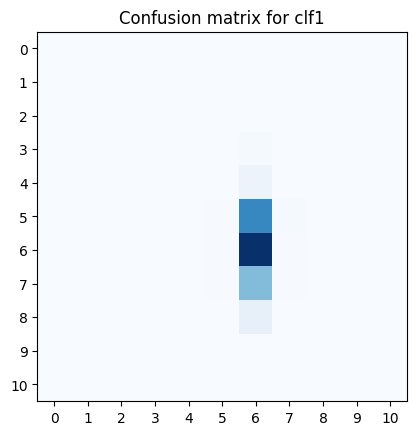

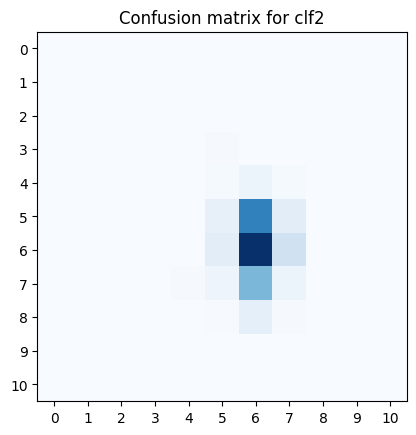

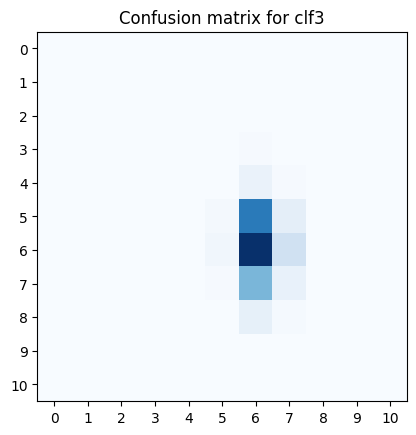

In [42]:
cm1 = np.zeros((11, 11))
cm2 = np.zeros((11, 11))
cm3 = np.zeros((11, 11))

for i in range(len(yca_test)):
    cm1[int(yca_test[i])][int(yca1_pred_test[i])] += 1
    cm2[int(yca_test[i])][int(yca2_pred_test[i])] += 1
    cm3[int(yca_test[i])][int(yca3_pred_test[i])] += 1

print(cm1)
print("-"*60)
print(cm2)
print("-"*60)
print(cm3)
print("-"*60)

plt.imshow(cm1, cmap=plt.cm.Blues)
plt.xticks(np.arange(11))
plt.yticks(np.arange(11))
plt.title('Confusion matrix for clf1')
plt.show()

plt.imshow(cm2, cmap=plt.cm.Blues)
plt.xticks(np.arange(11))
plt.yticks(np.arange(11))
plt.title('Confusion matrix for clf2')
plt.show()

plt.imshow(cm3, cmap=plt.cm.Blues)
plt.xticks(np.arange(11))
plt.yticks(np.arange(11))
plt.title('Confusion matrix for clf3')
plt.show()

<br><br>

## 8. Analysis of Example 1 [3,0 valor] 

O exemplo 1 utiliza o conjunto de regras utilizado pelo GA para fazer uma previsão da qualidade do vinho.

Os valores das variáveis são avaliados pelas 100 regras otimizadas e no final é calculado o centroide da área calculada; é através desse valor que se obtém a previsão da qualidade do vinho.

Analisando o examplo e o conjunto de variáveis de entrada, conclui-se que as variáveis têm um maior grau de pertença às seguintes classes:

alcohol - high
fixed acidity - low
residual sugar - high
free sulfur dioxide - high
volatile acidity - normal

Após estes inputs serem avaliados pelas regras obtém-se um centróide que corresponde a Predicted Quality: 6.39.
Comparando com a Actual Quality: 7.00 obtém-se um desvio de 0.61; este valor permite ter a noção do quão afastada foi a previsão, oq eu não é possível no problema de classificação.

alcohol                10.966667
fixed acidity           6.000000
free sulfur dioxide    55.000000
residual sugar         10.800000
volatile acidity        0.290000
Name: 4656, dtype: float64 

Predicted Quality: 5.80
Actual Quality: 7.00


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


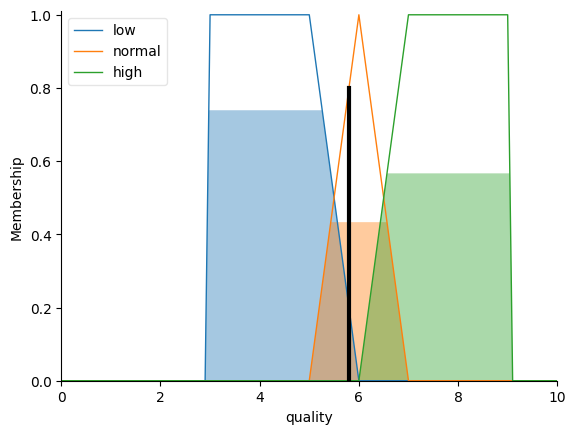

In [35]:
sample_index = 0
sample = X_test.iloc[sample_index]
print(sample, "\n")

# Set the inputs for the optimized simulator
optimized_simulator.input['alcohol'] = sample['alcohol']
optimized_simulator.input['fixed_acidity'] = sample['fixed acidity']
optimized_simulator.input['free_sulfur_dioxide'] = sample['free sulfur dioxide']
optimized_simulator.input['residual_sugar'] = sample['residual sugar']
optimized_simulator.input['volatile_acidity'] = sample['volatile acidity']

# Run the simulation
optimized_simulator.compute()

# Print the predicted quality
try:
    predicted_quality = optimized_simulator.output['quality']
    print("Predicted Quality: {:.2f}".format(predicted_quality))
except KeyError:
    print("ERROR: Quality output not available for the provided input!")

# Print the actual quality using the correct index from Y_test
actual_quality = Y_test.iloc[sample_index]
print("Actual Quality: {:.2f}".format(actual_quality))

quality.view(sim=optimized_simulator)

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

O exemplo 2 utiliza o conjunto de regras utilizado pelo GA para fazer uma previsão da qualidade do vinho.

Os valores das variáveis são avaliados pelas 100 regras otimizadas e no final é calculado o centroide da área calculada; é através desse valor que se obtém a previsão da qualidade do vinho.

Analisando o examplo e o conjunto de variáveis de entrada, conclui-se que as variáveis têm um maior grau de pertença às seguintes classes:

alcohol - low
fixed acidity - low
free sulfur dioxide - normal
residual sugar - high
volatile acidity - normal

Após estes inputs serem avaliados pelas regras obtém-se um centróide que corresponde a:
- Predicted Quality: 4.32.
- Predicted Quality from cfl1 5.84257314.
- Predicted Quality from cfl2 5.82441363.
- Predicted Quality from cfl3 6.03387538.

Comparando com a Actual Quality: 6.00 

alcohol                 9.50
fixed acidity           5.90
free sulfur dioxide    34.00
residual sugar         12.30
volatile acidity        0.24
Name: 653, dtype: float64 

Predicted Quality: 4.32
Predicted quality from cfl1 [5.84257314]
Predicted quality from cfl2 [5.82441363]
Predicted quality from cfl3 [6.03387538]
Actual Quality: 6.00


c:\Users\D\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


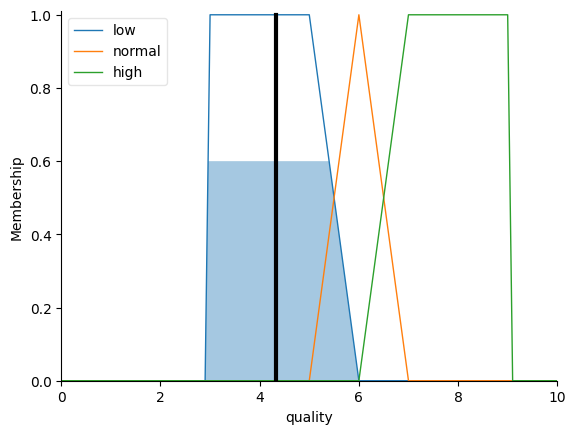

In [53]:
sample_index = 20
sample = X_test.iloc[sample_index]
print(sample, "\n")

# Set the inputs for the optimized simulator
optimized_simulator.input['alcohol'] = sample['alcohol']
optimized_simulator.input['fixed_acidity'] = sample['fixed acidity']
optimized_simulator.input['free_sulfur_dioxide'] = sample['free sulfur dioxide']
optimized_simulator.input['residual_sugar'] = sample['residual sugar']
optimized_simulator.input['volatile_acidity'] = sample['volatile acidity']

# Run the simulation
optimized_simulator.compute()

# Print the predicted quality
try:
    predicted_quality = optimized_simulator.output['quality']
    print("Predicted Quality: {:.2f}".format(predicted_quality))
except KeyError:
    print("ERROR: Quality output not available for the provided input!")

quality.view(sim=optimized_simulator)

Centroids_and_Areas_of_example = [np.array(Centroids_and_Areas[sample_index])]
CA_example_poly =polynomial_features(Centroids_and_Areas_of_example, P)

prevision_of_clf1 = (clf1.predict(Centroids_and_Areas_of_example))
prevision_of_clf2 = (clf2.predict(CA_example_poly))
prevision_of_clf3 = (clf3.predict(CA_example_poly))

# Print the actual quality using the correct index from Y_test
print("Predicted quality from cfl1",prevision_of_clf1)
print("Predicted quality from cfl2",prevision_of_clf2)
print("Predicted quality from cfl3",prevision_of_clf3)
actual_quality = Y_test.iloc[sample_index]
print("Actual Quality: {:.2f}".format(actual_quality))


<br><br>
## 10. Pros and cons of the approach [2,0 valor]

Pros:

- Este sistema fuzzy apenas escala com o número de regras. Para este sistema o nº de linhas do dataset não tem influência no tempo de execução do algoritmo de otimização o que é uma grande vantagem quando se aplica a datasets com uma grande quantidade de linhas.
- Sistemas fuzzy são mais interpretáveis do que outros modelos de machine learning como redes neuronais ou métodos ensemble complexos. 
- Um modelo linear relativamente simples consegue transformar regras de inferência fuzzy "más" em resulatos bons na desfuzzisificação.

Cons:

- É necessário elevado poder computacional para executar o programa;
- É difícil usar o programa sem ser especializado em vinho (enólogo). Exemplificando, se fosse um especialista a definir as regras seria provavelmente mais fácil ter boas previsões.
- Sistemas fuzzy dependem de regras pré-definidas e não aprendem diretamente com os dados. Isto faz com que sejam menos ajustáveis para tarefas onde aprender padrões complexos ou relações dos dados seja essencial. 
- Sistemas fuzzy não lidam bem com o aumento do número de variáveis ou regras. O aumento da complexidade da base de regras leva a tempos de inferência mais lenots e processo de ajuste mais difíceis.
- Sistemas fuzzy lógicos são projetados para raciocínio qualitativo e podem não ter um desempenho tão bom quando são necessárias previsões numéricas precisas. 



<br><br>
## 11. Future improvements [2,0 valor]

Para a aboradagem que usa o Algoritmo Genético (GA) como forma de otimização do conjunto de regras é possível fazer bastantes melhorias, nomeadamente dos parâmetros do próprio algoritmo(população, mutações, nº genes, etc). Adicionalmente, seria boa ideia tornar o nº de regras e o seu formato um hiperparâmetro, ou seja, ao invés do nº de regras (100) e formato (IF a AND b THEN c) ter sido definido à priori, seria também otimizado pelo GA.

A utilização de mais classes para o output (quality) e a forma do fuzzy set pode ser uma melhoria futura. Isto iria complicar bastante a obtenção do conjunto de regras otimizado, dado que seriam necessárias mais regras para que pelo menos uma fosse ativada para cada conjunto de variáveis de entrada, mas por outro lado o modelo, provavelmente, seria menos biased e não tenderia a prever tanto a classe quality=6.

A utilização de outras métricas de avaliação da adequação do conjunto de regras ao modelo é também um importante fator a ter ewm conta. Durante a exploração de várias hipóteses testou-se o uso do MAE como métrica e apesar de ter melhor accuracy, isso acontecia devido a prever praticamente para todos os cojuntos de entrada a classe quality=6; como esta é predominante no dataset obviamente que a accuracy é afetada por isso.

Durante a otimização das regras pelo GA, penalizar o sistema quando este prevê quality=6 poderá ser uma forma de melhorar as previsões.

Ver como o numero de partições para obtenção de novas features para a desfuzzisificação afeta o perfomance e como ultizar outras metricas para ajudar neste processo.



<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>


Cortez, P., Cerdeira, A., Almeida, F., Matos, T., Reis, J.,
2009. Modeling wine preferences by data mining from
physicochemical properties. In Decision Support
Systems, Elsevier, 47(4), 547-553.

Nebot, Â., Mugica, F., Escobet, A., 2015. Modeling Wine Preferences from Physicochemical Properties using Fuzzy Techniques. In Proceedings of the 5th International Conference on Simulation and Modeling Methogologies, Technologies and Applications, 501-507 

Alcalá, R, Alcalá-Fdez. J., Casillas, J., Cordón, O.,
Herrera, F., 2007. Local identification of prototypes
for genetic learning of accurate TSK fuzzy rule-based
systems. International Journal of Intelligent Systems,
22, 909-941